# Interactive clustering and annotation of VAE_all/CondVAE_pert-CC experiment

This notebook creates the clustering `clustering_res0.5.npy`

In [1]:
from campa.constants import campa_config
from campa.tl import Experiment
from campa.tl import (
    Cluster,
    Experiment,
    get_clustered_cells,
    load_full_data_dict,
    add_clustering_to_adata,
)
from campa.pl import annotate_img
import os
import numpy as np
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

2022-10-19 10:38:27.398139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 10:38:27.537951: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-19 10:38:27.544348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 10:38:27.544368: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Reading config from /home/icb/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini


In [2]:
exp_name = 'VAE_all/CondVAE_pert-CC'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.001')

## Cluster data

In [4]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_latent': 'latent', 'X_umap': 'umap'})

/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
sc.pp.neighbors(adata, use_rep='X_latent')
sc.tl.leiden(adata, resolution=0.5, key_added='clustering_res0.5', random_state=0)
# write clustering to disk
np.save(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir, 'clustering_res0.5'), adata.obs['clustering_res0.5'])

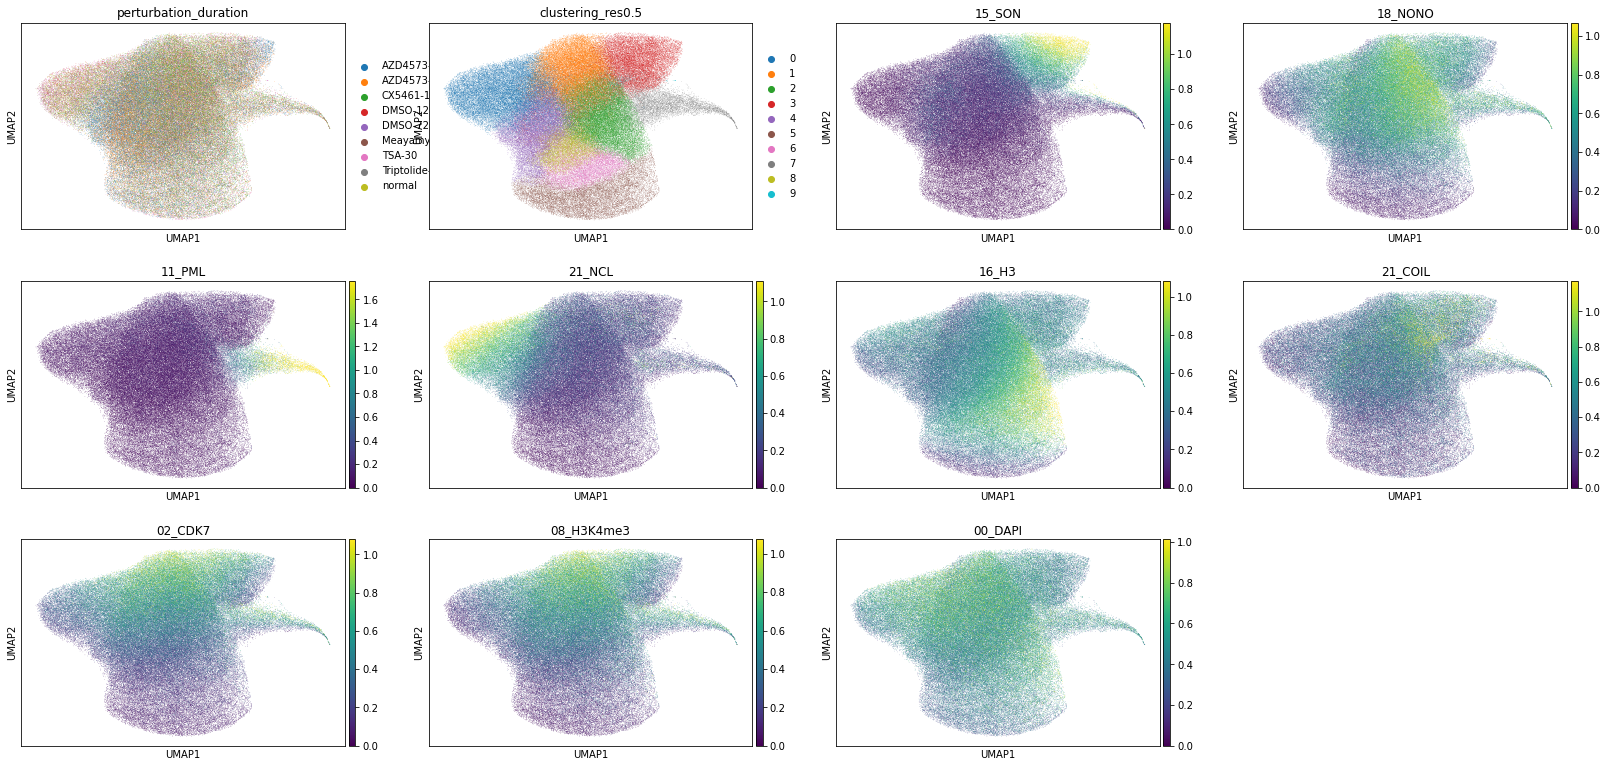

In [9]:
sc.pl.umap(adata, color=['perturbation_duration', 'clustering_res0.5', '15_SON', '18_NONO', 
                         '11_PML', '21_NCL',
                         '16_H3', '21_COIL',
                         '02_CDK7','08_H3K4me3',
                         '00_DAPI'
                        ], vmax='p99')

## Explore clustered data

In [3]:
# comment in for logging messages
#import logging
#logging.basicConfig(level=logging.INFO)

In [4]:
# quick plotting functions for looking at results
def plot_loadings(adata,var='clustering'):
    pixel_values_annotated = pd.concat([
        pd.DataFrame(adata.X,columns=adata.var_names).reset_index(drop=True),
        adata.obs[[var]].reset_index(drop=True)],
        axis=1)
    #col_standard = sns.clustermap(pixel_values_annotated.groupby(var).aggregate('mean'), z_score=0, cmap="vlag", figsize=[10,4],vmin=-3, vmax=3)
    row_standard = sns.clustermap(pixel_values_annotated.groupby(var).aggregate('mean'), z_score=1, cmap="vlag", figsize=[14,9],vmin=-3, vmax=3, method='ward')

In [5]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_latent': 'latent', 'X_umap': 'umap'})

/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [10]:
# add clustering and colormap (from cluster_name_annotation.csv) to adata
cl.set_cluster_name('clustering_res0.5') 
add_clustering_to_adata(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir), 'clustering_res0.5', adata, cl.cluster_annotation)


/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


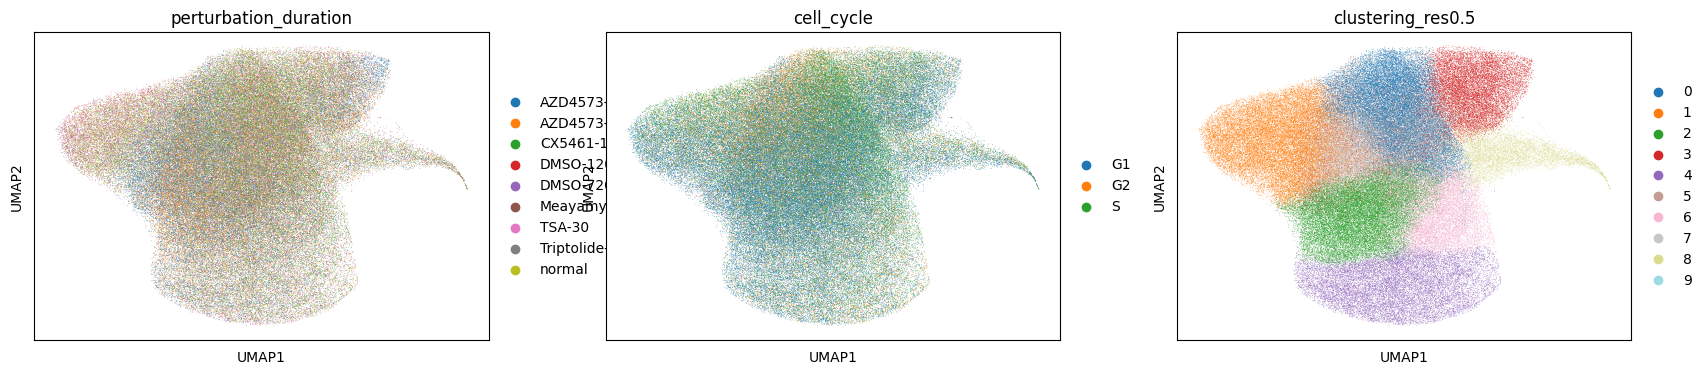

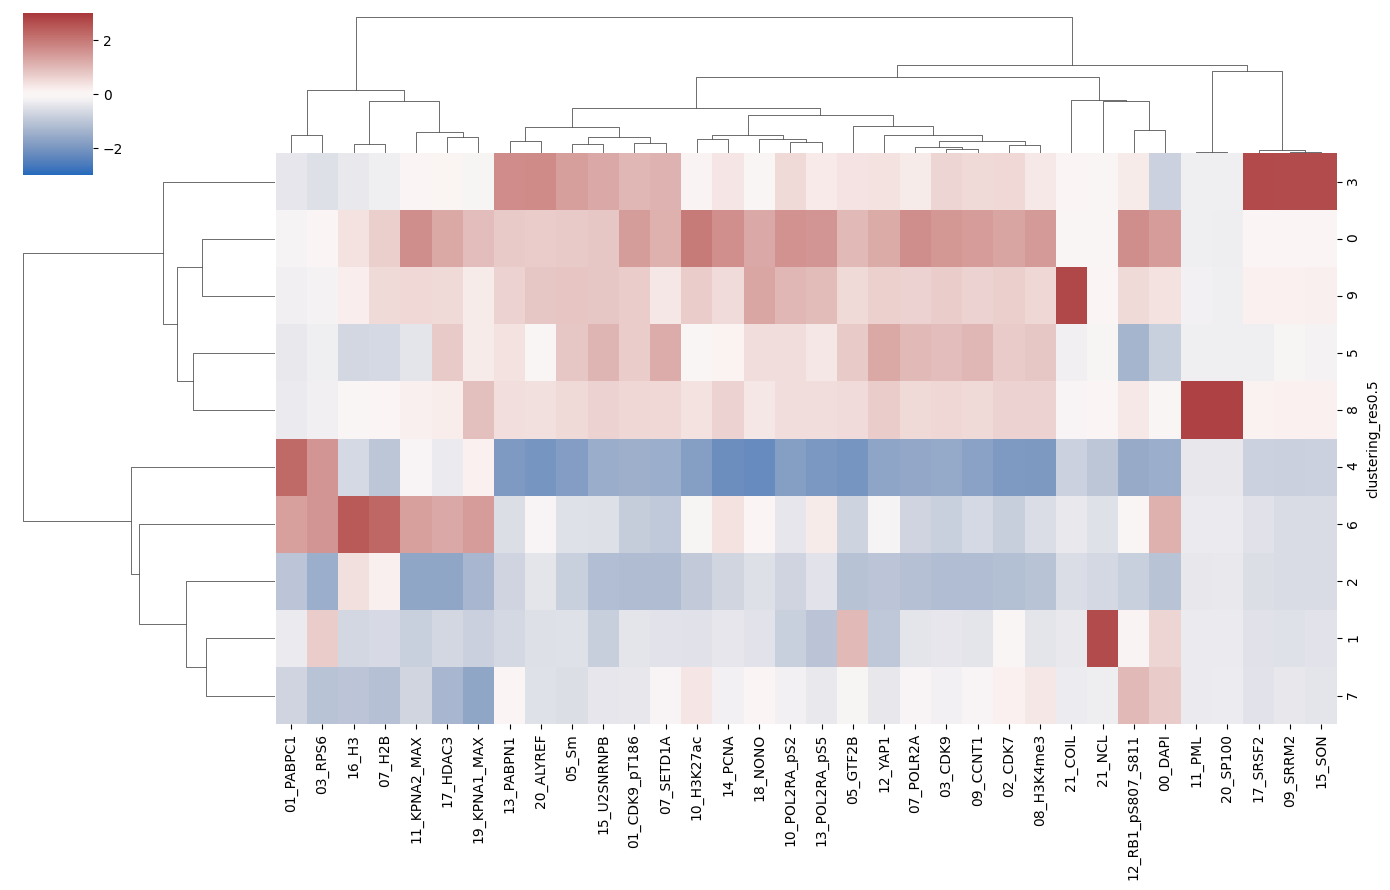

In [7]:
plt.rcParams['figure.figsize'] = [6, 4]
sc.pl.umap(adata, color=['perturbation_duration', 'cell_cycle', 'clustering_res0.5'], vmax='p99')

plot_loadings(adata, 'clustering_res0.5')

In [8]:
# NOTE: this may take a couple of minutes
# load data
exp = Experiment.from_dir(exp_name)
mpp_datas = load_full_data_dict(exp)
# project clustering to some example cells
example_cells = {}
example_cells.update(get_clustered_cells(mpp_datas, cl, 'clustering_res0.5', num_objs=5))

184A1_unperturbed/I09
184A1_unperturbed/I11
184A1_unperturbed/J10
184A1_unperturbed/J12
184A1_DMSO/I14
184A1_DMSO/J16
184A1_AZD4573/I13
184A1_AZD4573/I17
184A1_AZD4573/J14
184A1_AZD4573/J18
184A1_AZD4573/J21
184A1_CX5461/I18
184A1_CX5461/J09
184A1_CX5461/J22
184A1_TSA/I16
184A1_TSA/J13
184A1_TSA/J20
184A1_triptolide/I10
184A1_triptolide/J15
184A1_meayamycin/I12
184A1_meayamycin/I20


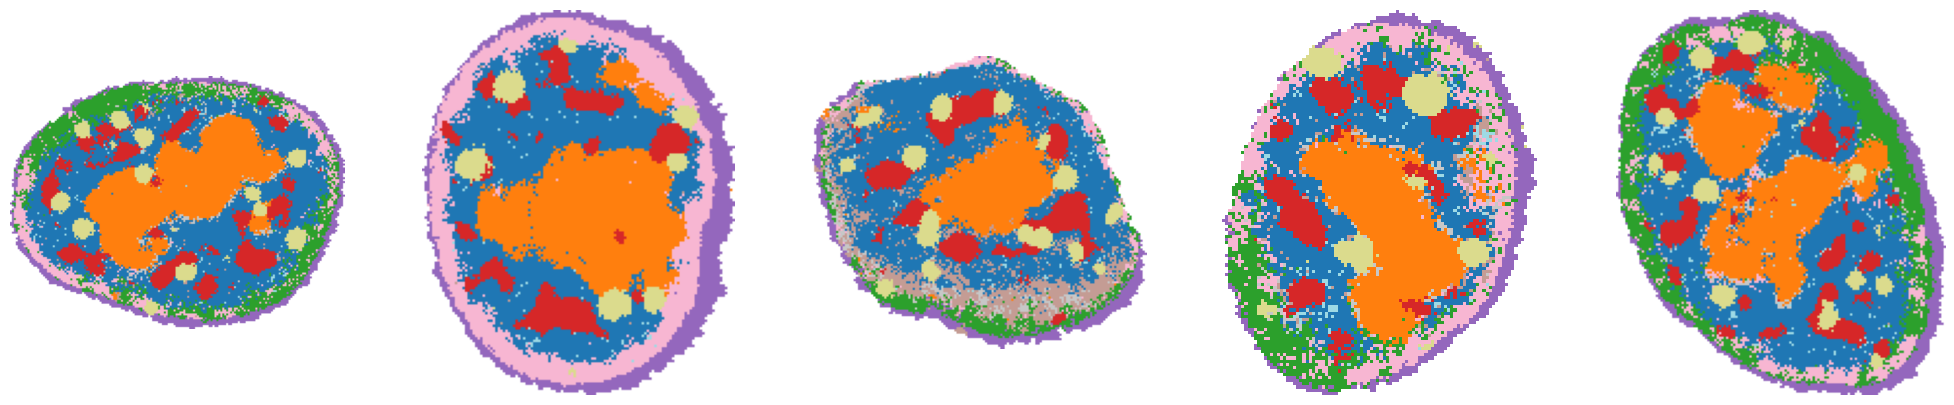

In [9]:
# plot example cells
data_dir = '184A1_unperturbed/I09'
fig, axes = plt.subplots(1,5, figsize=(25,5), squeeze=False)
for i in range(5):
    axes[0,i].imshow(example_cells['clustering_res0.5_colored'][data_dir][i])
for ax in axes.flat:
    ax.axis('off')

### Get HPA subcellular locations of clusters

In [6]:
cluster_name = 'clustering_res0.5'
results = cl.get_hpa_localisation(cluster_name=cluster_name, thresh=1, limit_to_groups={'perturbation_duration':'normal'})


/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Text(0.5, 0.98, 'Subcellular locations by HPA for clustering clustering_res0.5')

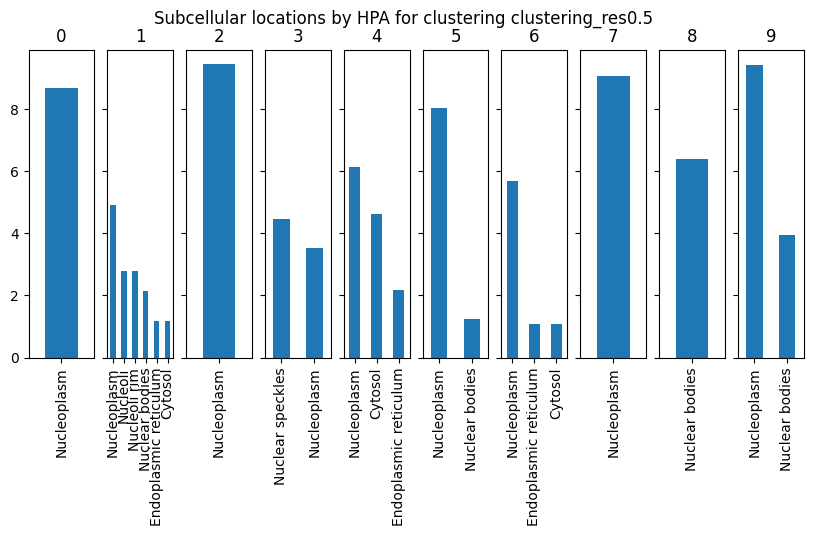

In [7]:
# plot HPA annotation of clusters
fig, axes = plt.subplots(1, len(results), squeeze=False, sharey=True, figsize=(10,4))
for ax, (idx, res) in zip(axes.flat, results.items()):
    res['subcellular_locations'].plot(kind='bar', ax=ax)
    ax.set_title(idx)
plt.suptitle(f'Subcellular locations by HPA for clustering {cluster_name}')

In [5]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)

/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [103]:
from typing import Any, List, Tuple, Union, Mapping, Iterable, Optional
from scipy.stats import zscore

import urllib.request, json 
import pandas as pd

def query_hpa_subcellular_location(genes: List[str], gene_weights: Optional[List[float]] = None, filter_reliability: List[str]=['Uncertain']) -> Mapping[str, Any]:
    """
    Query the Human Protein Atlas for a consensus subcellular locations from a list of genes.
    
    HPA is availablen at https://www.proteinatlas.org 
    
    Parameters
    ----------
    genes
        List of genes to query in the HPA (using field "gene_name").
    gene_weights
        List of weights for each gene, used to compute main subcellular locations.
    filter_reliability
        Do not return genes with this subcellular location reliability ("Reliability IF").
        Available reliabilities (in order from most reliable to least reliable) are: Enhanced, Supported, Approved, Uncertain.
        See also https://www.proteinatlas.org/about/assays+annotation#if_reliability_score 
    
    Returns
    -------
        Mapping[str, Any]:
            Results dictionary with keys:
                - hpa_data: data frame of available genes and their subcellular locations according to HPA data.
                - main_subcellular_location: subcellular location where most genes are located
                - subcellular_locations: pd.Series of all subcellular locations ocurring for this list of genes, sorted by most frequent
    """
    if gene_weights is None:
        gene_weights = [1]*len(genes)
    url_str = 'http://www.proteinatlas.org/api/search_download.php?search=gene_name:{gene}&format=json&columns=g,gs,scml,scal,relce&compress=no'
    data = []
    index = []
    for gene in genes:
        if gene is None or gene == np.nan:
            continue
        cur_url_str = url_str.format(gene=gene)
        with urllib.request.urlopen(cur_url_str) as url:
            res = json.load(url)
            if len(res) > 0:
                index.append(gene)
                data.append(res[0])
            else:
                print(f'No result for {gene}')
    data = pd.DataFrame(data, index=index)
    # filter out any columns with filter_reliability or None reliability score
    data = data[~data["Reliability (IF)"].isin(filter_reliability + [None])]
    data = pd.merge(data, pd.DataFrame({'gene_weights': gene_weights}, index=genes), how='left', right_index=True, left_index=True)
    # summarise locations & their occurrence counts
    summary = {}
    for locations, weight in zip(data['Subcellular main location'], data['gene_weights']):
        for loc in locations:
            if loc not in summary.keys():
                summary[loc] = weight
            else:
                summary[loc] += weight
    summary = pd.Series(summary).sort_values(ascending=False)
    return {'hpa_data': data, 'subcellular_locations': summary}


def get_hpa_localisation(self, cluster_name: str ='clustering_res0.5', thresh: float=1, limit_to_groups: Optional[Mapping[str, Union[str, List[str]]]] = None, **kwargs: Any):
    """
    Query subcellular localisation for each cluster from Human Protein Atlas (https://www.proteinatlas.org).
    
    Calculates cluster loadings and returns the subcellular localisations of the channels that are enriched for each cluster.
    Requires "hpa_gene_name" column in channel_metadata.csv file in DATA_DIR to map channel names to genes available in HPA.
    
    Parameters
    ----------
    cluster_name
        Clustering to calculate localisations for. Must exist already.
    thresh
        Minimum z-scored intensity value of channel in cluster to be considered for HPA query. 
        thresh=0 considers all enriched channel of this cluster
    limit_to_groups
        Dict with obs as keys and groups from obs as values, to subset data before calculating loadings.
    kwargs
        Keyword arguments for :func:`campa.tl.query_hpa_subcellular_location`.
    """
    
    self.set_cluster_name(cluster_name)
    adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_latent': 'latent', 'X_umap': 'umap'})
    # subset data
    if limit_to_groups is None:
        limit_to_groups = {}
    for key, groups in limit_to_groups.items():
        if not isinstance(groups, list):
            groups = [groups]
        adata = adata[adata.obs[key].isin(groups)]
    
    # calculate mean z-scored intensity values
    means = pd.concat([
            pd.DataFrame(cur_adata.X,columns=cur_adata.var_names).reset_index(drop=True),
            cur_adata.obs[[cluster_name]].reset_index(drop=True)],
            axis=1).groupby(cluster_name).aggregate('mean')
    means = means.apply(zscore, axis=1)

    # for each cluster, determine channels that localise to this cluster (mean z-scored intensity > thresh)
    # and map channel names to gene names used in HPA
    channels_metadata = pd.read_csv(os.path.join(cl.data_config.DATA_DIR, 'channels_metadata.csv'), index_col=0)
    cluster_localisation = {}
    for idx, row in means.iterrows():
        channels = list(row[row>thresh].index)
        weights = list(row[row>thresh])
        cluster_localisation[idx] = (list(channels_metadata.set_index('name').loc[channels].gene_name_hpa), weights)
    
    # query hpa for each cluster
    results = {}
    for idx, (genes, weights) in cluster_localisation.items():
        results[idx] = query_hpa_subcellular_location(genes, gene_weights=weights, **kwargs)
        
    return results
    


/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Text(0.5, 0.98, 'Subcellular locations by HPA for clustering clustering_res0.5')

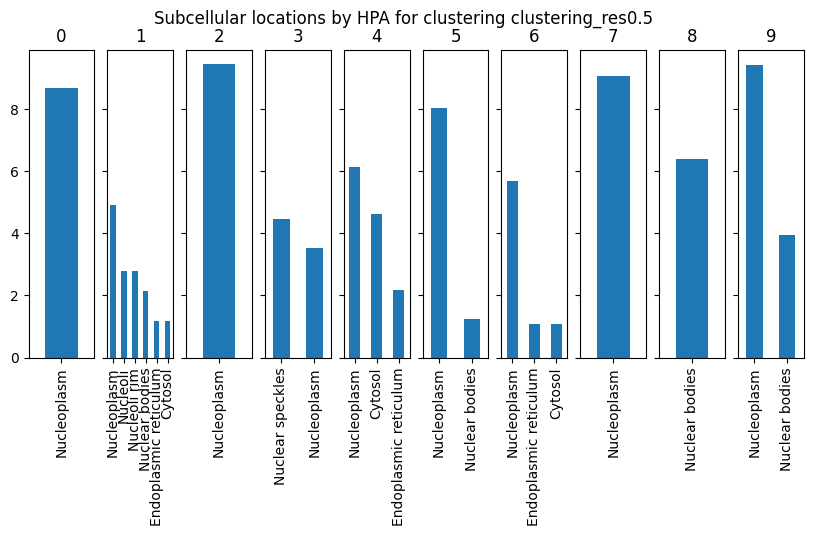

In [105]:
cluster_name = 'clustering_res0.5'
results = get_hpa_localisation(cl, cluster_name=cluster_name)

# plot HPA annotation of clusters
fig, axes = plt.subplots(1, len(results), squeeze=False, sharey=True, figsize=(10,4))
for ax, (idx, res) in zip(axes.flat, results.items()):
    res['subcellular_locations'].plot(kind='bar', ax=ax)
    ax.set_title(idx)
plt.suptitle(f'Subcellular locations by HPA for clustering {cluster_name}')

## Save annotation and colormap

In [19]:
annotation = {'0': 'Nucleoplasm',
              '1': 'Nucleolus',
              '2': 'Nucleoplasm',
              '3': 'Nuclear speckles',
              '4': 'Extra-nuclear',
              '5': 'Nucleoplasm',
              '6': 'Nuclear periphery',
              '7': 'Nucleoplasm',
              '8': 'PML bodies',
              '9': 'Cajal bodies'
             }
# combine nucleoplasm with nuclear periphery
annotation_coarse = {'0': 'Nucleoplasm',
              '1': 'Nucleolus',
              '2': 'Nucleoplasm',
              '3': 'Nuclear speckles',
              '4': 'Extra-nuclear',
              '5': 'Nucleoplasm',
              '6': 'Nucleoplasm',
              '7': 'Nucleoplasm',
              '8': 'PML bodies',
              '9': 'Cajal bodies'
             }

# name all clusters
annotation_fine = {'0': 'Nucleoplasm.1',
              '1': 'Nucleolus',
              '2': 'Nucleoplasm.2',
              '3': 'Nuclear speckles',
              '4': 'Extra-nuclear',
              '5': 'Nucleoplasm.3',
              '6': 'Nuclear periphery',
              '7': 'Nucleoplasm.4',
              '8': 'PML bodies',
              '9': 'Cajal bodies'
             }

colors = {'Nucleoplasm':'#118ab2',
          'Nucleolus':'#073b4c',
          'Nuclear speckles':'#ffd166',
          'Extra-nuclear':'#c6beaa',
          'Nuclear periphery':'#06d6a0',
          'PML bodies': '#ef476f',
          'Cajal bodies': '#bca0d0',
          'Nucleoplasm.1':'#118ab2',
          'Nucleoplasm.2':'#11aab2',
          'Nucleoplasm.3':'#25b9ea',
          'Nucleoplasm.4':'#116fb2',
         }

cl.set_cluster_name('clustering_res0.5')
cl.add_cluster_annotation(annotation, 'annotation', colors=colors)
cl.add_cluster_annotation(annotation_coarse, 'annotation_coarse', colors=colors)
cl.add_cluster_annotation(annotation_fine, 'annotation_fine', colors=colors)

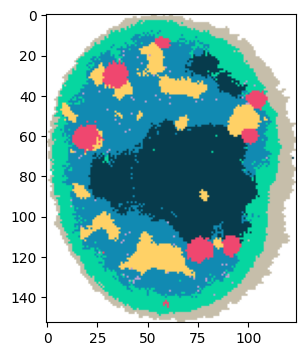

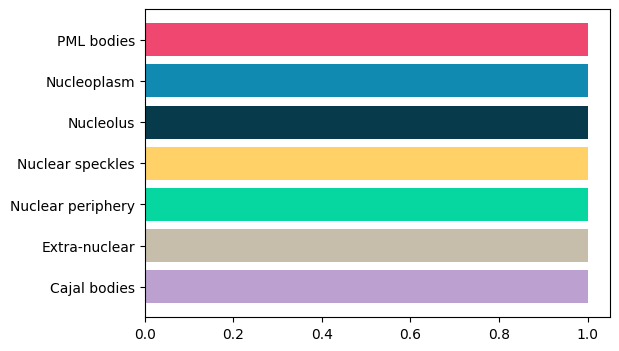

In [20]:
# check out cell colored by new annotation
plt.imshow(annotate_img(example_cells['clustering_res0.5']['184A1_unperturbed/I09'][1], 
                        annotation=cl.cluster_annotation, from_col=cl.config['cluster_name'], to_col='annotation', color=True))
plt.show()

# makeshift legend
df = cl.cluster_annotation.groupby('annotation')['annotation_colors'].first()
plt.barh(y=range(len(df)), width=1, color=df)
_ = plt.yticks(range(len(df)), df.index, rotation=0)

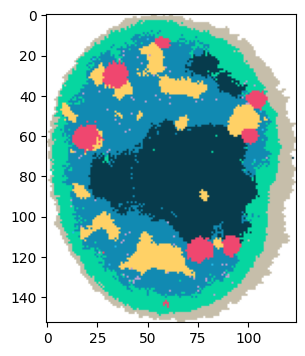

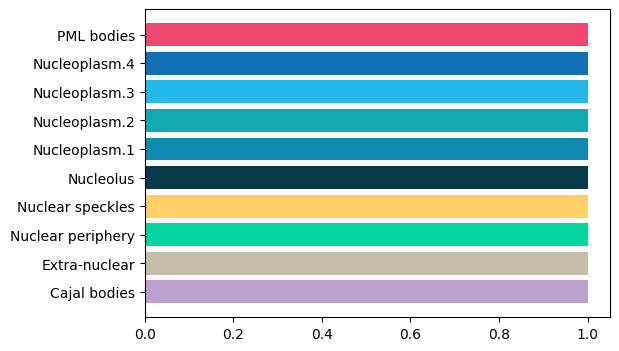

In [21]:
# check out cell colored by new annotation
plt.imshow(annotate_img(example_cells['clustering_res0.5']['184A1_unperturbed/I09'][1], 
                        annotation=cl.cluster_annotation, from_col=cl.config['cluster_name'], to_col='annotation_fine', color=True))
plt.show()

# makeshift legend
df = cl.cluster_annotation.groupby('annotation_fine')['annotation_fine_colors'].first()
plt.barh(y=range(len(df)), width=1, color=df)
_ = plt.yticks(range(len(df)), df.index, rotation=0)